In [1]:
import pandas as pd #untuk memuat kumpulan data ke dalam DataFrame
import seaborn as sns #untuk visualisasi data dan untuk melakukan analisis data eksplorasi (EDA)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #untuk membagi kumpulan data menjadi subset pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier #machine learning algorithms yang akan digunakan untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #metrik untuk mengevaluasi kinerja model
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [2]:
# untuk load kumpulan data dari URL web menggunakan pd.read_csv(). Ini akan membaca kumpulan data ke dalam pandas DataFrame
url = "https://raw.githubusercontent.com/chellee18/DataMining/refs/heads/main/week%206%20cancer%20%26%20adult/adult.csv"
df = pd.read_csv(url)

df.sample(10) #Menunjukan 10 data acak

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11932,54,Private,254152,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
22134,25,?,394820,Some-college,10,Separated,?,Unmarried,White,Female,0,0,20,United-States,<=50K
41036,26,Private,476558,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
25274,39,Private,67136,Assoc-voc,11,Separated,Adm-clerical,Not-in-family,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
14849,21,Private,284651,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
4075,63,Self-emp-not-inc,141962,10th,6,Divorced,Craft-repair,Not-in-family,White,Male,0,0,20,United-States,<=50K
40412,46,Self-emp-not-inc,353012,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,50,United-States,>50K
3444,46,Private,37353,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,45,United-States,<=50K
41298,66,Private,174788,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,20,United-States,<=50K
18412,41,Local-gov,22155,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,0,60,United-States,<=50K


In [3]:
#untuk melihat gambaran umum dari dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Menghapus spasi di nama kolom
df.columns = df.columns.str.strip()

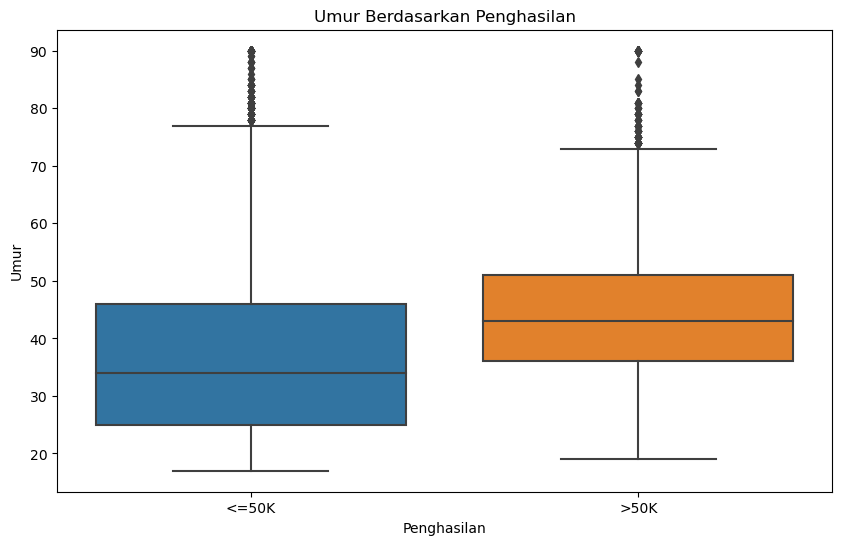

In [6]:
# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Box plot untuk umur berdasarkan penghasilan
sns.boxplot(x='income', y='age', data=df)
plt.title('Umur Berdasarkan Penghasilan')
plt.xlabel('Penghasilan')
plt.ylabel('Umur')
plt.show()


C:\Users\Michelle\AppData\Local\Temp\ipykernel_28708\1193212992.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


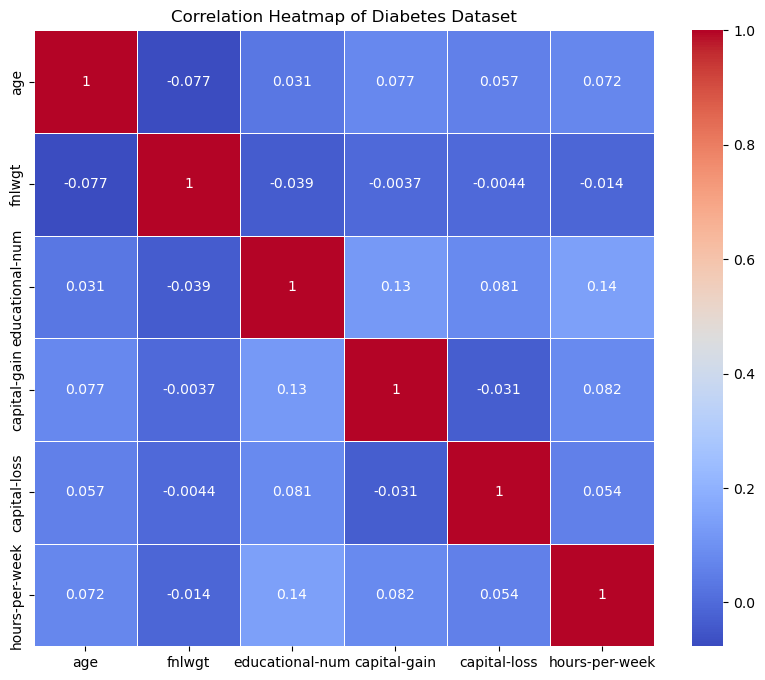

In [7]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In [8]:
df.dropna(inplace=True)

In [9]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the encoder for potential inverse transformation

X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()  # Instantiate the classifier
nb_classifier.fit(X_train, y_train)  # Train the classifier

GaussianNB()

In [12]:
#b
nb_y_pred = nb_classifier.predict(X_test) # untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya (nb_classifier).

In [13]:
#c
cm = confusion_matrix(y_test, nb_y_pred) #Untuk membuat confussion matrix dari nb
print("Confusion Matrix:\n", cm)

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) #Untuk menujukan hasil akurasi

Confusion Matrix:
 [[7099  380]
 [1580  710]]
Accuracy Score: 0.7994


In [14]:
#e
print(classification_report(y_test, nb_y_pred)) #Untuk print classification report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [15]:
# Metode Logistic regresion
# a
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)  # membuat model logisticc regresion

LogisticRegression(max_iter=200)

In [16]:
# b
y_pred_log = classifier.predict(X_test) # membuat prediksi
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
comparison_table.head() # menampilkan 5 baris pertama dari DataFrame

,y_test,y_pred
7762,0,0
23881,0,0
30507,1,1
28911,0,0
19484,0,0


In [17]:
#c
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) # print hasil accuracy score

Accuracy Score: 0.7925


In [18]:
# d
cmatrix = confusion_matrix(y_test, y_pred_log)  #untuk membuat matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[7045  434]
 [1593  697]]


In [19]:
# e
print (classification_report (y_test, y_pred_log)) # print hasil classification report

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7479
           1       0.62      0.30      0.41      2290

    accuracy                           0.79      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769

